In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0
 98% 97.0M/98.7M [00:05<00:00, 24.0MB/s]
100% 98.7M/98.7M [00:05<00:00, 19.4MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/melanoma-skin-cancer-dataset-of-10000-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import callbacks
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_ds=image_dataset_from_directory(
    "/content/melanoma_cancer_dataset/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    validation_split=0.2,
    subset="training",
    seed=1337,
)
val_ds=image_dataset_from_directory(
    "/content/melanoma_cancer_dataset/train",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256),
    validation_split=0.2,
    subset="validation",
    seed=1337,
)

Found 9605 files belonging to 2 classes.
Using 7684 files for training.
Found 9605 files belonging to 2 classes.
Using 1921 files for validation.


In [6]:
test_ds=image_dataset_from_directory(
    "/content/melanoma_cancer_dataset/test",
    labels="inferred",
    label_mode='int',
    image_size=(256,256),
    batch_size=32,
    seed=1337,
)

Found 1000 files belonging to 2 classes.


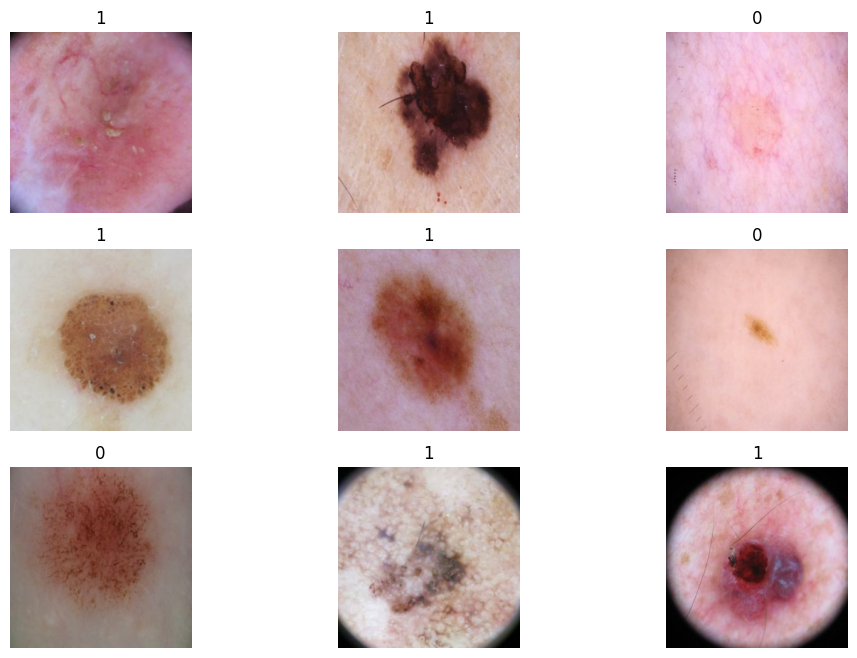

In [13]:
plt.figure(figsize=(12,8))
for images, labels in train_ds.take(1):
    for i in range(min(9, len(images))):
        ax=plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
plt.show()

In [14]:
# Normalize (0-1)
def process(image,label):
    image=tf.cast(image/255. ,tf.float32)
    return image,label
train_ds=train_ds.map(process)
val_ds=val_ds.map(process)
test_ds=test_ds.map(process)

In [15]:
test_images=[]
test_labels=[]
for features, labels in test_ds:
  test_images.append(features)
  test_labels.append(labels)

In [16]:
test_images=np.concatenate(test_images)
test_labels=np.concatenate(test_labels)

In [17]:
test_images.shape

(1000, 256, 256, 3)

In [18]:
test_labels.shape

(1000,)

CNN Model 1

In [ ]:
# create CNN model
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=100,validation_data=val_ds)

Epoch 1/100
241/241 [==============================] - 35s 105ms/step - loss: 7.5536 - accuracy: 0.7596 - val_loss: 0.6128 - val_accuracy: 0.5898
Epoch 2/100
241/241 [==============================] - 25s 100ms/step - loss: 1.9057 - accuracy: 0.7297 - val_loss: 0.6197 - val_accuracy: 0.8662
Epoch 3/100
241/241 [==============================] - 25s 103ms/step - loss: 1.4869 - accuracy: 0.7258 - val_loss: 0.4461 - val_accuracy: 0.7548
Epoch 4/100
241/241 [==============================] - 24s 99ms/step - loss: 0.6877 - accuracy: 0.7763 - val_loss: 0.7250 - val_accuracy: 0.8522
Epoch 5/100
241/241 [==============================] - 24s 100ms/step - loss: 0.8126 - accuracy: 0.7427 - val_loss: 0.9277 - val_accuracy: 0.8600
Epoch 6/100
241/241 [==============================] - 24s 98ms/step - loss: 0.6867 - accuracy: 0.7572 - val_loss: 0.6818 - val_accuracy: 0.7553
Epoch 7/100
241/241 [==============================] - 24s 100ms/step - loss: 0.6909 - accuracy: 0.7853 - val_loss: 0.6597 - v

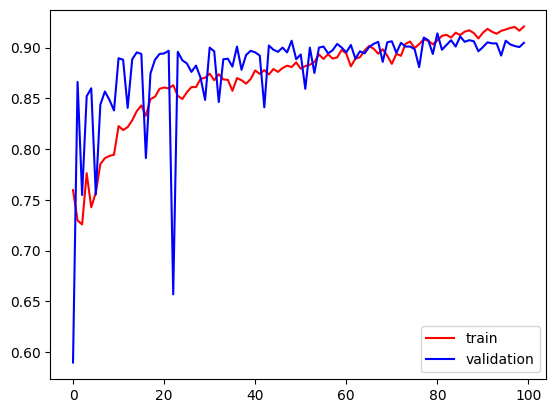

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(test_images)

32/32 [==============================] - 1s 28ms/step


In [ ]:
y_pred=np.where(y_pred>0.5,1,0)

In [ ]:
y_pred.shape

(1000, 1)

In [ ]:
test_labels.shape

(1000,)

In [ ]:
y_pred=y_pred.reshape(1,-1)[0]

In [ ]:
y_pred.shape

(1000,)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
print(classification_report(y_pred, test_labels))

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       548
           1       0.86      0.95      0.90       452

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



<Axes: >

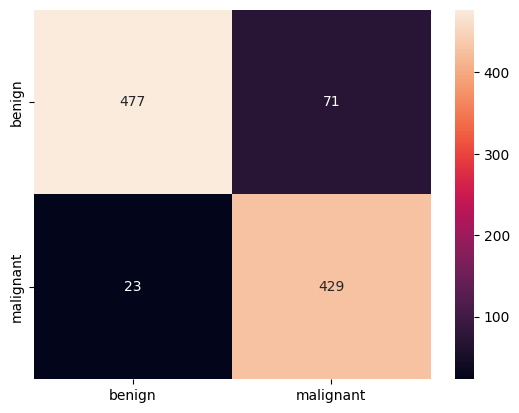

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_pred, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])

Model 2

In [ ]:
# create CNN model
model2=Sequential()

model2.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='leaky_relu',input_shape=(256,256,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='leaky_relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='leaky_relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model2.add(Flatten())

model2.add(Dense(128,activation='leaky_relu'))
model2.add(Dropout(0.5))
model2.add(Dense(64,activation='leaky_relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
early_stopping=callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
model2.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history2=model2.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    callbacks=[early_stopping])

Epoch 1/100
241/241 [==============================] - 34s 126ms/step - loss: 16.5567 - accuracy: 0.7738 - val_loss: 3.8614 - val_accuracy: 0.7449
Epoch 2/100
241/241 [==============================] - 27s 112ms/step - loss: 7.5880 - accuracy: 0.7909 - val_loss: 3.1124 - val_accuracy: 0.7600
Epoch 3/100
241/241 [==============================] - 30s 123ms/step - loss: 3.4782 - accuracy: 0.7992 - val_loss: 0.6462 - val_accuracy: 0.8839
Epoch 4/100
241/241 [==============================] - 28s 113ms/step - loss: 1.7046 - accuracy: 0.8073 - val_loss: 0.4854 - val_accuracy: 0.8771
Epoch 5/100
241/241 [==============================] - 28s 117ms/step - loss: 1.6926 - accuracy: 0.8053 - val_loss: 0.3857 - val_accuracy: 0.8745
Epoch 6/100
241/241 [==============================] - 28s 113ms/step - loss: 0.7011 - accuracy: 0.8164 - val_loss: 0.3198 - val_accuracy: 0.8870
Epoch 7/100
241/241 [==============================] - 28s 114ms/step - loss: 0.5698 - accuracy: 0.8309 - val_loss: 0.3048 

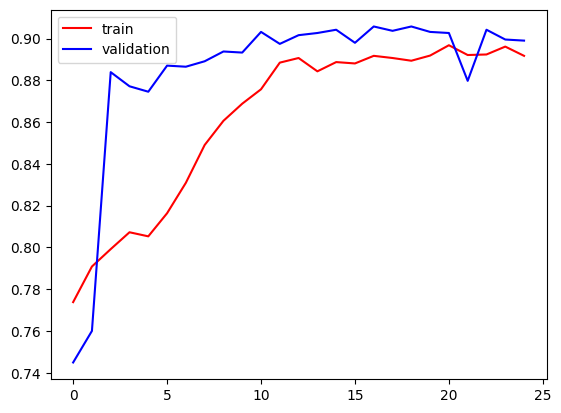

In [ ]:
plt.plot(history2.history['accuracy'],color='red',label='train')
plt.plot(history2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred2=model2.predict(test_images)

32/32 [==============================] - 2s 45ms/step


In [ ]:
y_pred2=np.where(y_pred2>0.5,1,0)

In [ ]:
y_pred2=y_pred2.reshape(1,-1)[0]

In [ ]:
y_pred2.shape

(1000,)

In [ ]:
print(classification_report(y_pred2, test_labels))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       534
           1       0.86      0.93      0.89       466

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



<Axes: >

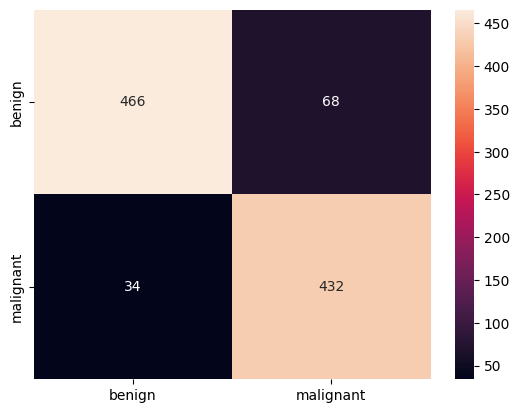

In [ ]:
sns.heatmap(confusion_matrix(y_pred2, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])

Model 3

In [ ]:
model3=Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(1, activation='sigmoid'))

In [ ]:
early_stopping=callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
model3.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
history3=model3.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    callbacks=[early_stopping])

Epoch 1/100
241/241 [==============================] - 32s 96ms/step - loss: 1.0957 - accuracy: 0.7660 - val_loss: 0.4647 - val_accuracy: 0.7772
Epoch 2/100
241/241 [==============================] - 22s 89ms/step - loss: 0.5247 - accuracy: 0.8309 - val_loss: 0.6026 - val_accuracy: 0.7350
Epoch 3/100
241/241 [==============================] - 22s 90ms/step - loss: 0.3843 - accuracy: 0.8597 - val_loss: 0.3407 - val_accuracy: 0.8688
Epoch 4/100
241/241 [==============================] - 23s 92ms/step - loss: 0.3455 - accuracy: 0.8689 - val_loss: 0.4729 - val_accuracy: 0.8152
Epoch 5/100
241/241 [==============================] - 25s 103ms/step - loss: 0.2965 - accuracy: 0.8863 - val_loss: 0.4730 - val_accuracy: 0.8246
Epoch 6/100
241/241 [==============================] - 22s 89ms/step - loss: 0.2983 - accuracy: 0.8904 - val_loss: 0.4738 - val_accuracy: 0.8464
Epoch 7/100
241/241 [==============================] - 24s 100ms/step - loss: 0.2830 - accuracy: 0.8967 - val_loss: 0.3534 - val_

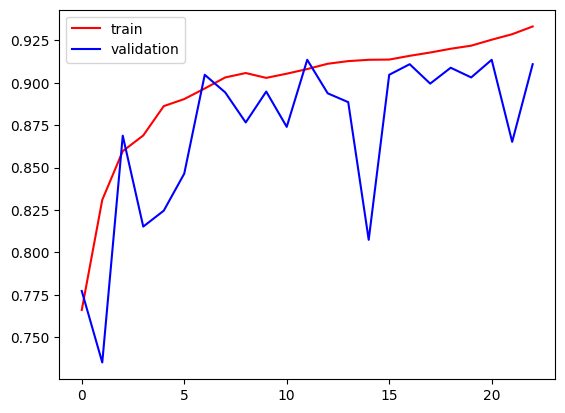

In [ ]:
plt.plot(history3.history['accuracy'],color='red',label='train')
plt.plot(history3.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred3=model3.predict(test_images)

32/32 [==============================] - 1s 36ms/step


In [ ]:
y_pred3=np.where(y_pred3>0.5,1,0)

In [ ]:
y_pred3=y_pred3.reshape(1,-1)[0]

In [ ]:
y_pred3.shape

(1000,)

In [ ]:
print(classification_report(y_pred3, test_labels))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       556
           1       0.85      0.95      0.90       444

    accuracy                           0.90      1000
   macro avg       0.90      0.91      0.90      1000
weighted avg       0.91      0.90      0.90      1000



<Axes: >

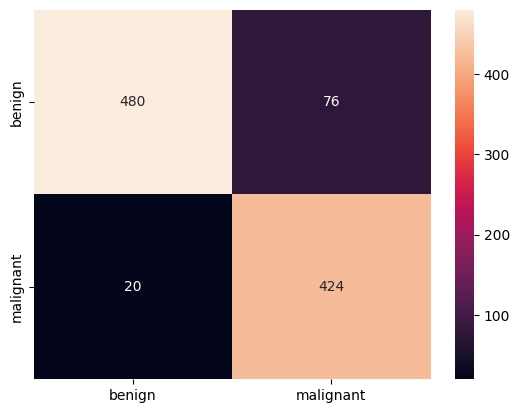

In [ ]:
sns.heatmap(confusion_matrix(y_pred3, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])

Model 4

In [ ]:
# Create the model
model4=Sequential()
model4.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(256, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(256, (3, 3), activation='relu'))
model4.add(MaxPooling2D((2, 2)))


model4.add(Flatten())
model4.add(Dense(4096, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(4096, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

In [ ]:
model4.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping=callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
history4=model4.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
                    callbacks=[early_stopping])

Epoch 1/100
241/241 [==============================] - 34s 114ms/step - loss: 0.4760 - accuracy: 0.7663 - val_loss: 0.3694 - val_accuracy: 0.8693
Epoch 2/100
241/241 [==============================] - 26s 106ms/step - loss: 0.3935 - accuracy: 0.8311 - val_loss: 0.3199 - val_accuracy: 0.8782
Epoch 3/100
241/241 [==============================] - 26s 108ms/step - loss: 0.3264 - accuracy: 0.8600 - val_loss: 0.2911 - val_accuracy: 0.8860
Epoch 4/100
241/241 [==============================] - 26s 107ms/step - loss: 0.3152 - accuracy: 0.8665 - val_loss: 0.3229 - val_accuracy: 0.8589
Epoch 5/100
241/241 [==============================] - 26s 106ms/step - loss: 0.3088 - accuracy: 0.8687 - val_loss: 0.2771 - val_accuracy: 0.8850
Epoch 6/100
241/241 [==============================] - 26s 106ms/step - loss: 0.3048 - accuracy: 0.8714 - val_loss: 0.2643 - val_accuracy: 0.8938
Epoch 7/100
241/241 [==============================] - 28s 116ms/step - loss: 0.3570 - accuracy: 0.8499 - val_loss: 0.3112 -

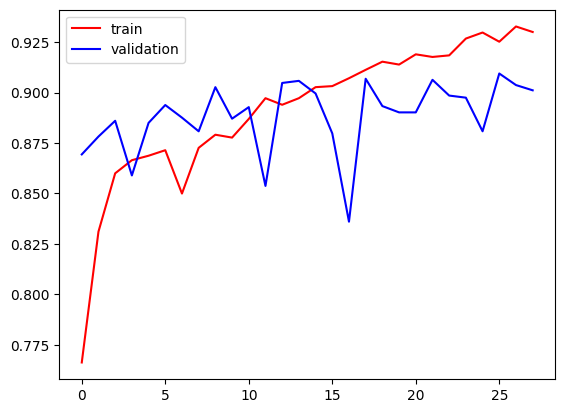

In [ ]:
plt.plot(history4.history['accuracy'],color='red',label='train')
plt.plot(history4.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
y_pred4=model4.predict(test_images)

32/32 [==============================] - 1s 30ms/step


In [ ]:
y_pred4=np.where(y_pred4>0.5,1,0)

In [ ]:
y_pred4=y_pred4.reshape(1,-1)[0]

In [ ]:
y_pred4.shape

(1000,)

In [ ]:
print(classification_report(y_pred4, test_labels))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       530
           1       0.88      0.93      0.90       470

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



<Axes: >

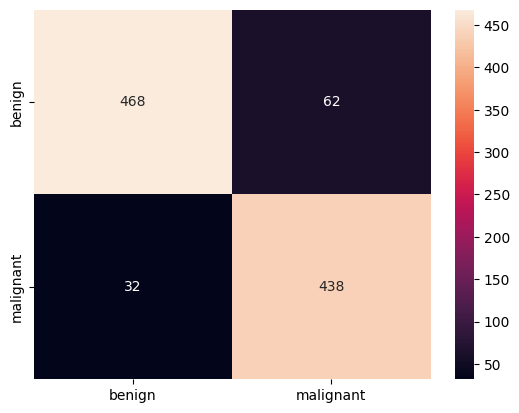

In [ ]:
sns.heatmap(confusion_matrix(y_pred4, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])

Model 5

In [19]:
# Create the model
model5=Sequential()
model5.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))

model5.add(Conv2D(128, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))


model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [20]:
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history5=model5.fit(train_ds,
                    validation_data=val_ds,
                    epochs=100,
)

Epoch 1/100
241/241 [==============================] - 49s 159ms/step - loss: 2.2680 - accuracy: 0.7638 - val_loss: 1.6524 - val_accuracy: 0.5643
Epoch 2/100
241/241 [==============================] - 35s 144ms/step - loss: 0.8019 - accuracy: 0.7983 - val_loss: 0.5938 - val_accuracy: 0.7069
Epoch 3/100
241/241 [==============================] - 35s 144ms/step - loss: 0.5439 - accuracy: 0.8302 - val_loss: 0.3942 - val_accuracy: 0.8839
Epoch 4/100
241/241 [==============================] - 35s 142ms/step - loss: 0.4243 - accuracy: 0.8514 - val_loss: 0.5608 - val_accuracy: 0.7548
Epoch 5/100
241/241 [==============================] - 34s 142ms/step - loss: 0.4195 - accuracy: 0.8563 - val_loss: 0.3243 - val_accuracy: 0.8719
Epoch 6/100
241/241 [==============================] - 37s 153ms/step - loss: 0.3619 - accuracy: 0.8619 - val_loss: 0.3812 - val_accuracy: 0.8834
Epoch 7/100
241/241 [==============================] - 34s 141ms/step - loss: 0.3497 - accuracy: 0.8675 - val_loss: 0.2926 -

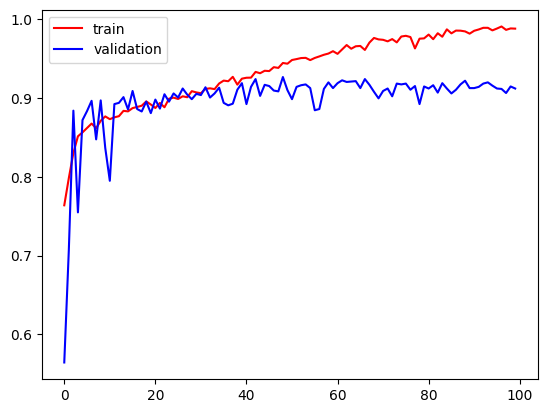

In [22]:
plt.plot(history5.history['accuracy'],color='red',label='train')
plt.plot(history5.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [23]:
y_pred5=model5.predict(test_images)

32/32 [==============================] - 2s 48ms/step


In [24]:
y_pred5=np.where(y_pred5>0.5,1,0)

In [25]:
y_pred5=y_pred5.reshape(1,-1)[0]

In [26]:
y_pred5.shape

(1000,)

In [29]:
print(classification_report(y_pred5, test_labels))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       523
           1       0.88      0.93      0.90       477

    accuracy                           0.91      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.91      0.91      0.91      1000



<Axes: >

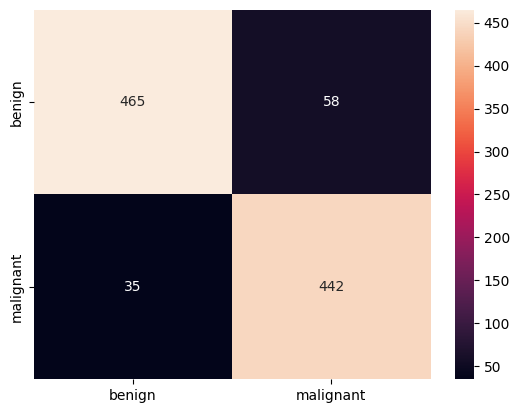

In [30]:
sns.heatmap(confusion_matrix(y_pred5, test_labels), fmt='g', annot=True , xticklabels=["benign", "malignant"], yticklabels=["benign", "malignant"])